# Python Example for Apriori Algorithm 
# Sanjay Gupta
# Date: 15-August-2021

# Step # 1: Importing Libraries

In [1]:
# Install the Libraries if below are not installed
# !pip install apriori
# !pip install mlxtend

# Load the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
#specify URL where data is located
url = 'https://raw.githubusercontent.com/sanjaygupta1963/Pythoncoding/main/Groceries_dataset.csv'

# Load Dataset from the Github URL
dfcombine = pd.read_csv(url)

In [3]:
dfcombine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
dfcombine.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
# Exploring the columns of the dataframe
dfcombine.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [6]:
# Exploring the different itemDecription of transactions
dfcombine.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

# Step # 2: Clean the Data

In [7]:
dfcombine['Date'] = pd.to_datetime(dfcombine['Date'])
dfcombine['date'] = dfcombine['Date'].dt.date
# Adding Month Column
dfcombine['month'] = dfcombine['Date'].dt.month
dfcombine['month'] = dfcombine['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))
# Adding Weekday Column
dfcombine['weekday'] = dfcombine['Date'].dt.weekday
dfcombine['weekday'] = dfcombine['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
# The str.strip() function is used to remove leading and trailing characters. 
# The str.lower() function is used to convert value in lower case.
dfcombine['itemDescription'] = dfcombine['itemDescription'].str.strip() 
dfcombine['itemDescription'] = dfcombine['itemDescription'].str.lower()
# dropping date_time column
dfcombine.drop('Date', axis = 1, inplace = True)
dfcombine.head()

,Member_number,itemDescription,date,month,weekday
0,1808,tropical fruit,2015-07-21,July,Tuesday
1,2552,whole milk,2015-05-01,May,Friday
2,2300,pip fruit,2015-09-19,September,Saturday
3,1187,other vegetables,2015-12-12,December,Saturday
4,3037,whole milk,2015-01-02,January,Friday


# Step # 3: Data Analysis

Text(0.5, 1.0, 'Delivery Tips by type')

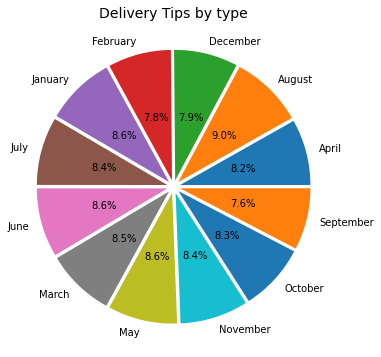

In [8]:
months = dfcombine.groupby('month')['Member_number'].count()
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=months, autopct="%.1f%%", explode=[0.05]*12, labels=months.keys(), pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14)

In [9]:
days = dfcombine.groupby('weekday')['Member_number'].count()
print(days.keys())

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='weekday')


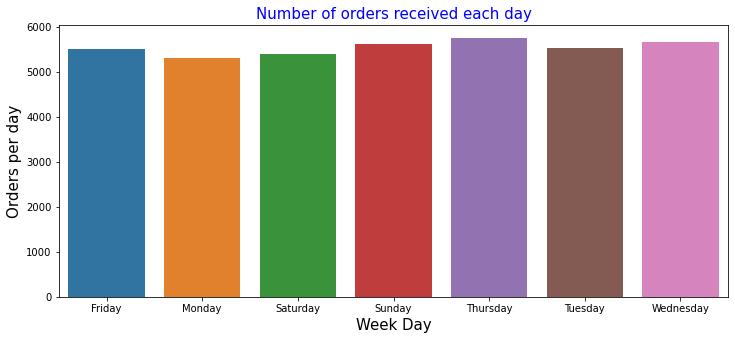

In [10]:
plt.figure(figsize=(12,5))
sns.barplot(x=days.keys(), y=days)
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'blue', size = 15)
plt.show()

# Step # 4: Applying the Apriori Algorithm

In [11]:
dfcombine['itemDescription'] = dfcombine.groupby(['Member_number', 'date'])['itemDescription'].transform(lambda x: ','.join(x))
dfcombine

,Member_number,itemDescription,date,month,weekday
0,1808,"tropical fruit,rolls/buns,candy",2015-07-21,July,Tuesday
1,2552,"whole milk,tropical fruit,chocolate",2015-05-01,May,Friday
2,2300,"pip fruit,other vegetables,flour",2015-09-19,September,Saturday
3,1187,"other vegetables,onions,shopping bags",2015-12-12,December,Saturday
4,3037,"whole milk,other vegetables,white bread",2015-01-02,January,Friday
...,...,...,...,...,...
38760,4471,"whole milk,yogurt,sliced cheese",2014-08-10,August,Sunday
38761,2022,"cat food,yogurt,candy",2014-02-23,February,Sunday
38762,1097,"sausage,whole milk,cake bar",2014-04-16,April,Wednesday
38763,1510,"beef,canned beer,fruit/vegetable juice",2014-03-12,March,Wednesday


In [12]:
lst=[]
for i in range(0,len(dfcombine)-1):    
    data = dfcombine['itemDescription'][i].split(',')
    lst.append(data)

In [13]:
te = TransactionEncoder()
te_ary = te.fit(lst).transform(lst)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
df_new

,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38759,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
38761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
38762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [19]:
!pip install Pillow
import urllib.request
from PIL import Image
urllib.request.urlretrieve("https://raw.githubusercontent.com/sanjaygupta1963/Pythoncoding/main/Apriori-Rules.png", "Apriori-Rules.png")
img = Image.open("Apriori-Rules.png")
img.show()

In [15]:
frq_items = apriori(df_new, min_support=0.02,use_colnames=True)
frq_items

,support,itemsets
0,0.039624,(beef)
1,0.024739,(berries)
2,0.054742,(bottled beer)
3,0.069497,(bottled water)
4,0.044165,(brown bread)
5,0.041895,(butter)
6,0.020586,(butter milk)
7,0.055954,(canned beer)
8,0.033072,(chicken)
9,0.028093,(chocolate)


In [16]:
rules = association_rules(frq_items, metric = "confidence", min_threshold = 0.1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(rolls/buns),(whole milk),0.127954,0.183753,0.022237,0.173790,0.945782,-0.001275,0.987942
1,(other vegetables),(whole milk),0.137679,0.183753,0.022340,0.162263,0.883052,-0.002959,0.974348
0,(whole milk),(other vegetables),0.183753,0.137679,0.022340,0.121578,0.883052,-0.002959,0.981670
2,(whole milk),(rolls/buns),0.183753,0.127954,0.022237,0.121016,0.945782,-0.001275,0.992108
